# Analisi Dati

## 1. Import delle librerie

In [50]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Caricamento del dataset

In [51]:
df = pd.read_csv('california_housing_data.csv')

In [52]:
df = df.drop(columns = ['Population'])

In [53]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,2.181467,37.85,-122.25,3.422


In [54]:
print(df.info())        # Tipi di colonne e valori mancanti
print(df.describe())    # Statistiche principali

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   AveOccup     20640 non-null  float64
 5   Latitude     20640 non-null  float64
 6   Longitude    20640 non-null  float64
 7   MedHouseVal  20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms      AveOccup  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675      3.070655   
std        1.899822     12.585558      2.474173      0.473911     10.386050   
min        0.499900      1.000000      0.846154      0.333333      0.692308   
25%        2.563400     18.00000

# AveRooms -> presenza di outlier da controllare 

In [55]:
print(df.isnull().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [56]:
# Seleziono solo le colonne numeriche
numeric_df = df.select_dtypes(include=np.number)
# Salva i nomi delle colonne numeriche in columns
columns = numeric_df.columns

In [57]:
# Statistiche principali con pandas direttamente
stats = {
    "min": numeric_df.min(),
    "max": numeric_df.max(),
    "mean": numeric_df.mean(),
    "median": numeric_df.median(),
    "std": numeric_df.std()
}

In [58]:
# Posizione asse x per i grafici
x = np.arange(len(columns))

## Grafici con Matplotlib

### Grafico a barre per media e mediana

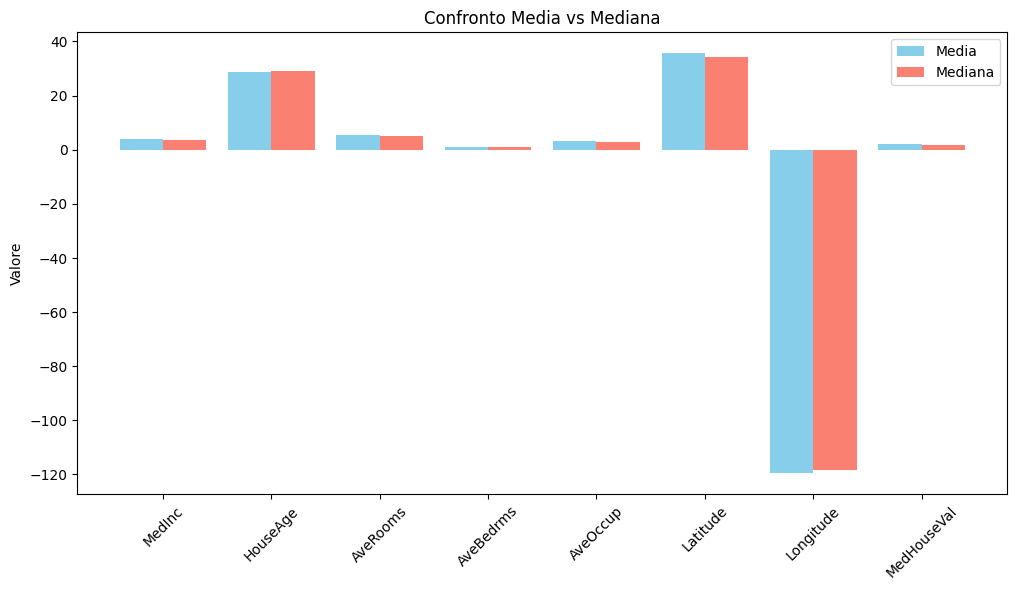

In [59]:
plt.figure(figsize=(12,6))
plt.bar(x - 0.2, stats['mean'], width=0.4, label='Media', color='skyblue')
plt.bar(x + 0.2, stats['median'], width=0.4, label='Mediana', color='salmon')
plt.xticks(x, columns, rotation=45)
plt.ylabel("Valore")
plt.title("Confronto Media vs Mediana")
plt.legend()
plt.show()

### Grafico a barre per min e max

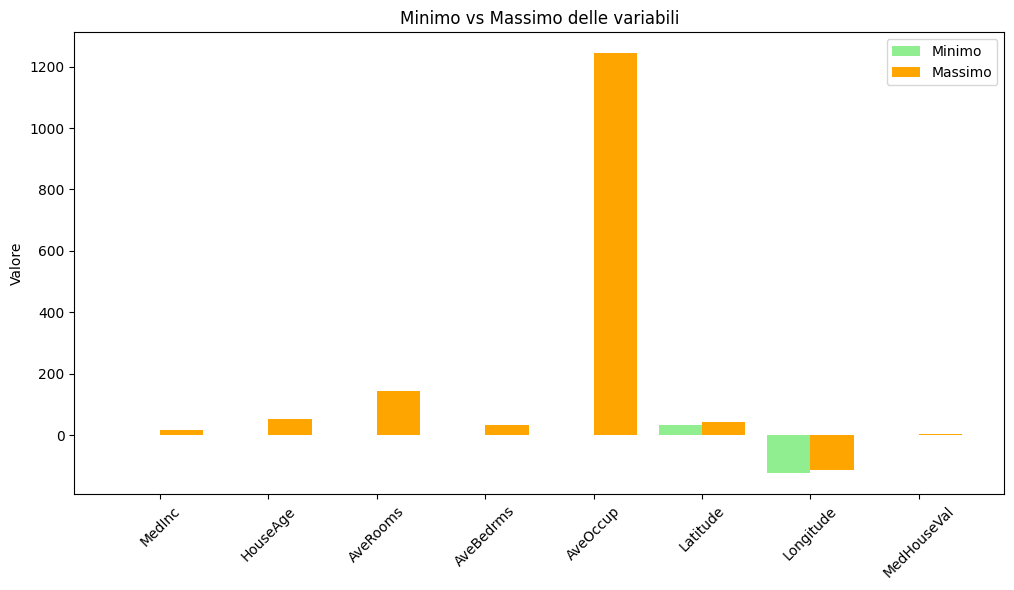

In [60]:
# mostra valori estremi per ogni variabile 
# individuazione di range e valori anormali 
plt.figure(figsize=(12,6))
plt.bar(x - 0.2, stats['min'], width=0.4, label='Minimo', color='lightgreen')
plt.bar(x + 0.2, stats['max'], width=0.4, label='Massimo', color='orange')
plt.xticks(x, columns, rotation=45)
plt.ylabel("Valore")
plt.title("Minimo vs Massimo delle variabili")
plt.legend()
plt.show()

### Grafico con deviazione standard (dispersione)

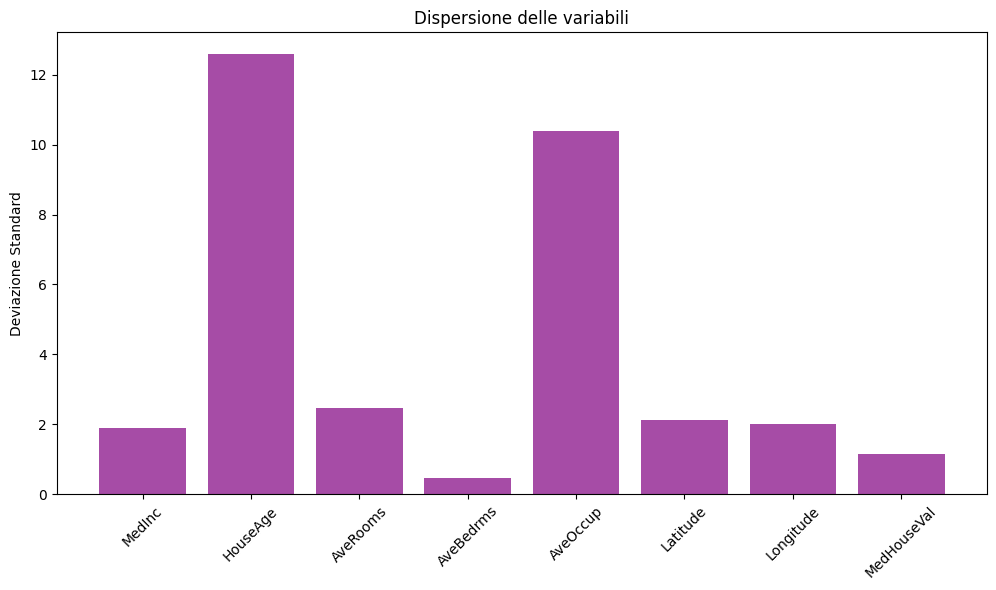

In [61]:
# mostra la dispersione dei valori attorno alla media 
# i valori più alti mostrano dati sparsi e maggiore vulnerabilità
plt.figure(figsize=(12,6))
plt.bar(x, stats['std'], color='purple', alpha=0.7)
plt.xticks(x, columns, rotation=45)
plt.ylabel("Deviazione Standard")
plt.title("Dispersione delle variabili")
plt.show()


### media ± deviazione standard con barre di errore

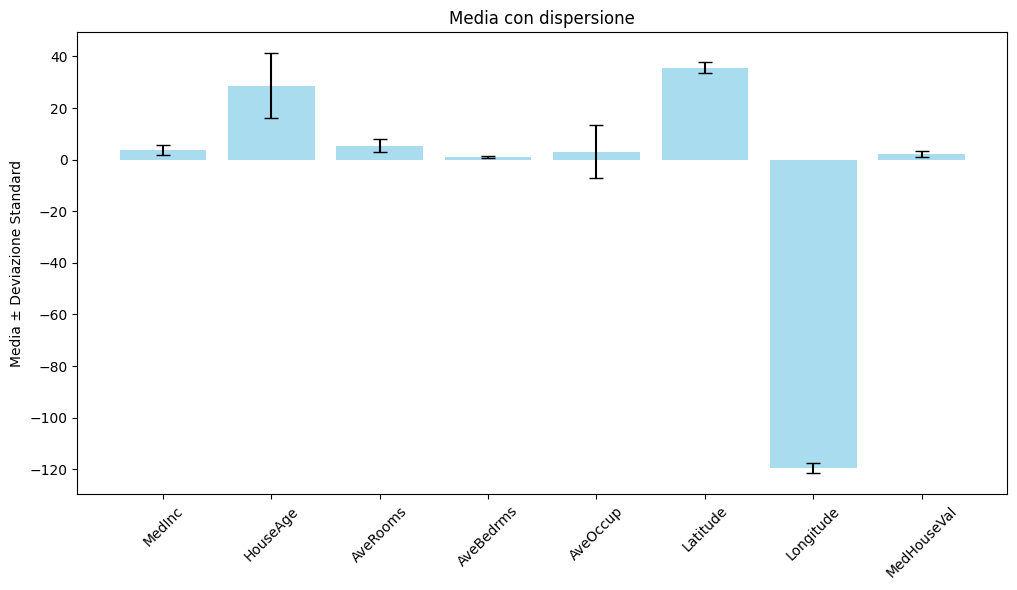

In [62]:
# media di ogni variabile con barre di errore che rappresentano la deviazione standard
# visualizza media e variabilità insieme
plt.figure(figsize=(12,6))
plt.bar(x, stats['mean'], yerr=stats['std'], color='skyblue', alpha=0.7, capsize=5)
plt.xticks(x, columns, rotation=45)
plt.ylabel("Media ± Deviazione Standard")
plt.title("Media con dispersione")
plt.show()


### Istogramma per distribuzione

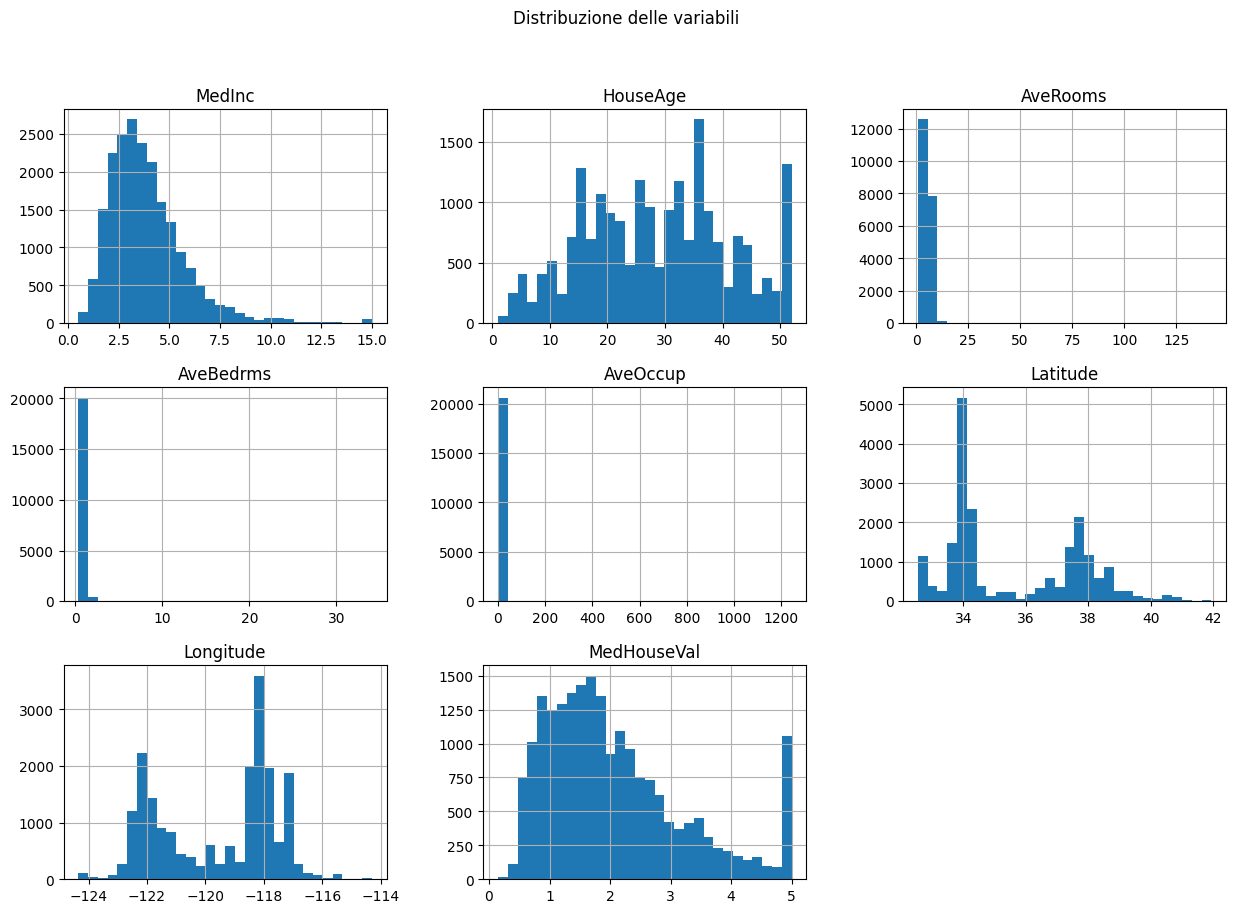

In [63]:
df.hist(bins = 30, figsize = (15, 10))
plt.suptitle("Distribuzione delle variabili")
plt.show()

### Scatterplot

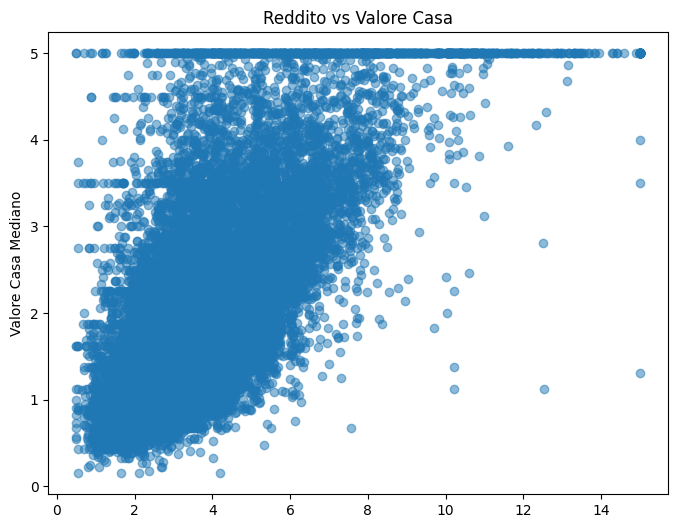

In [64]:
plt.figure(figsize = (8, 6))
plt.scatter(df['MedInc'], df['MedHouseVal'], alpha=0.5)
plt.xlabel = ("Reddito Mediano")
plt.ylabel("Valore Casa Mediano")
plt.title("Reddito vs Valore Casa")
plt.show()

In [65]:
print(df.columns)


Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude',
       'Longitude', 'MedHouseVal'],
      dtype='object')


## Grafici con seaborn

### Distribuzione per singola variabile

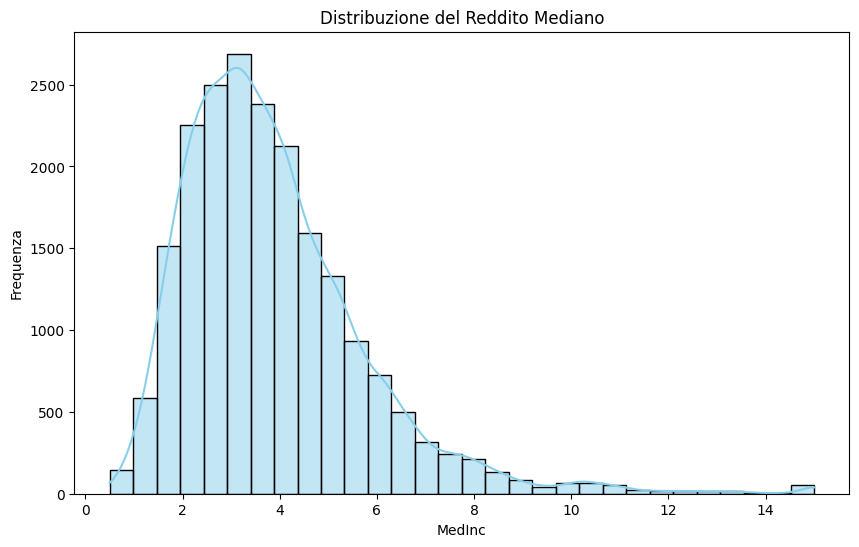

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['MedInc'], bins=30, kde=True, color='skyblue')
plt.title("Distribuzione del Reddito Medio")
plt.xlabel = ("MedInc")
plt.ylabel("Frequenza")
plt.show()


### Boxplot per rilevare outlier

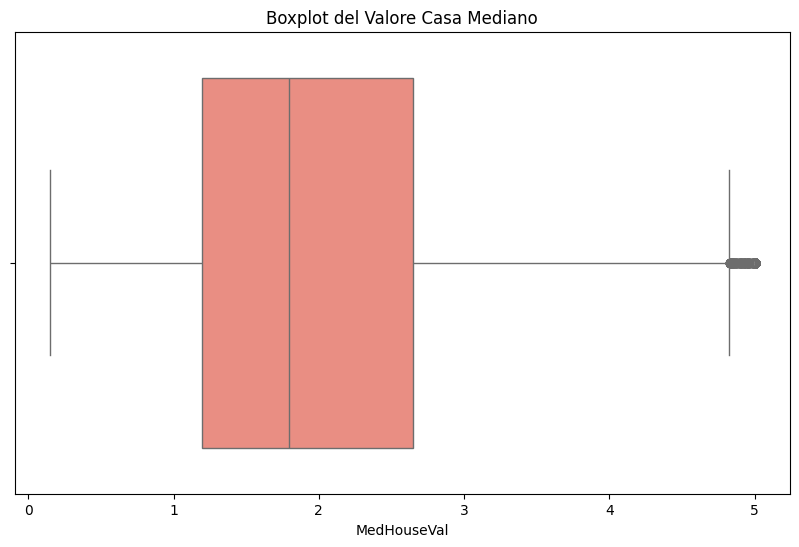

In [67]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['MedHouseVal'], color='salmon')
plt.title("Boxplot del Valore Casa Mediano")
plt.xlabel = ("MedHouseVal")  
plt.show()


### Scatterplot con regressione (regplot)

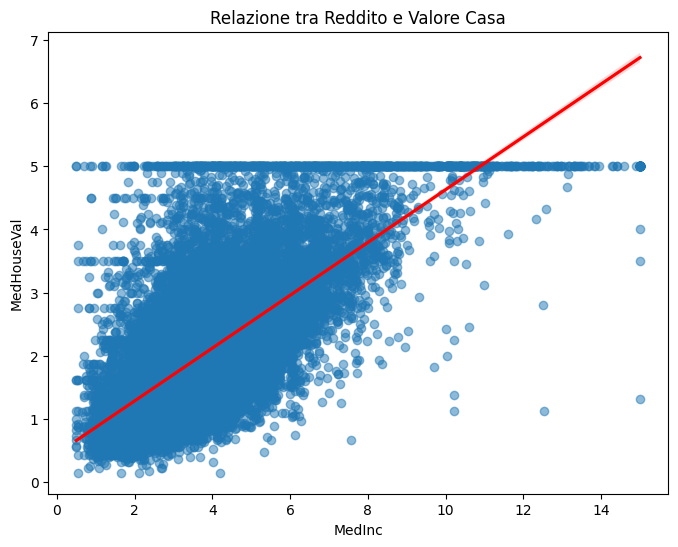

In [68]:
plt.figure(figsize=(8,6))
sns.regplot(x='MedInc', y='MedHouseVal', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Relazione tra Reddito e Valore Casa")
plt.show()


### Heatmap di correlazione

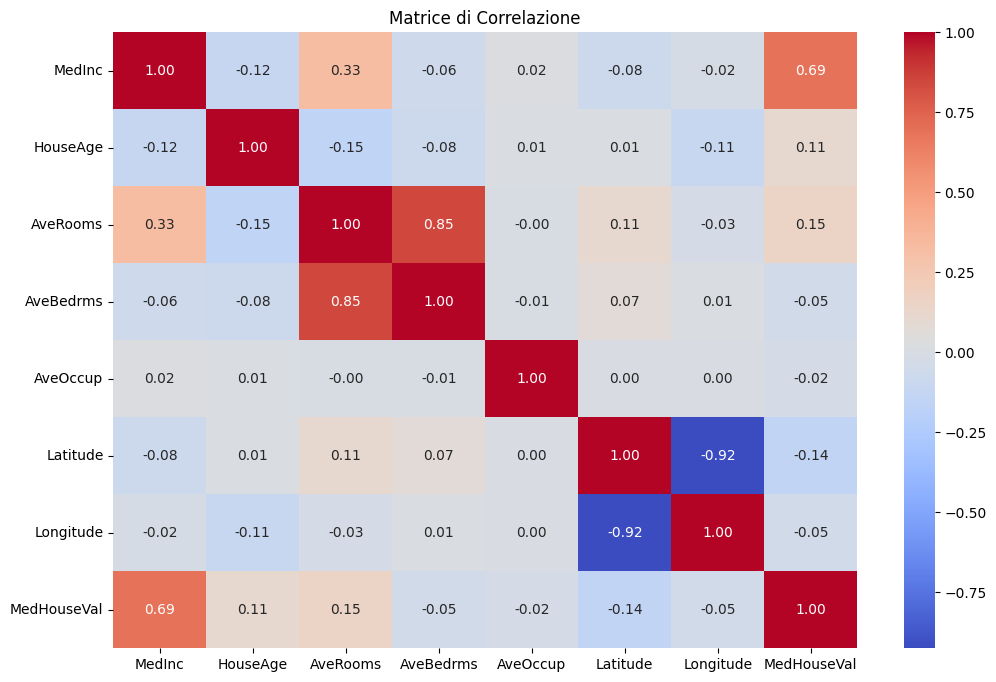

In [69]:
plt.figure(figsize=(12,8))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice di Correlazione")
plt.show()
